In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import cv2
import PIL
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json
import tensorflow as tf

In [5]:
# Load the saved model
loaded_model = tf.keras.models.load_model("E:\PKLot/vehicle/model.h5")


In [6]:
#show model sammary
loaded_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

In [16]:
#function for the testing image 
def test_image(image_path,model):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Resize the image to 224x224
    resized_image = cv2.resize(image, (224, 224))

    # Create an ImageDataGenerator for test with preprocessing function
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

    # Reshape the image to (1, height, width, channels)
    resized_image = np.expand_dims(resized_image, axis=0)

    # Generate batches of images
    batch_size = 1
    test_generator = test_datagen.flow(resized_image, batch_size=batch_size)
    predicted_labels = model.predict(test_generator)
    predicted_labels = np.argmax(predicted_labels, axis=1)
    #label maping
    label_mapping ={0:'Ambulance',1: 'Bicycle',2: 'Bus',3: 'Car',4: 'Limousine',5: 'Motorcycle',6: 'Segway',7: 'Tank',8: 'Taxi',9: 'Truck',10: 'Van'}
    predicted_string_labels = [label_mapping[label] for label in predicted_labels]
    
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Plot the image
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.title( predicted_string_labels )
    plt.show()
    
    return predicted_string_labels
   
    

In [17]:
#test images
image_path = "E:/PKLot/vehicle/test/testset/000305.jpg"
predicted_labels = test_image(image_path,loaded_model)

1/1 [==============================] - 1s 1s/step


In [19]:
image_path = "E:/PKLot/vehicle/test/testset/000216.jpg"
predicted_labels = test_image(image_path,loaded_model)

1/1 [==============================] - 0s 41ms/step


In [20]:
image_path = "E:/PKLot/vehicle/test/testset/000232.jpg"
predicted_labels = test_image(image_path,loaded_model)

1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 45ms/step


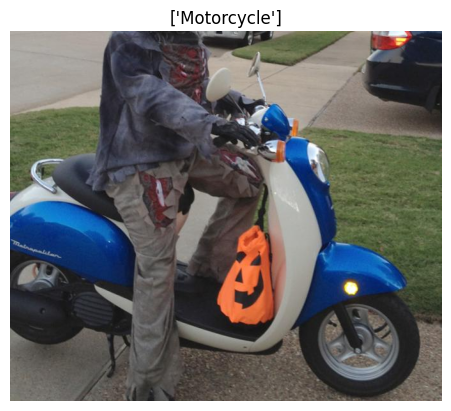

In [22]:
image_path = "E:/PKLot/vehicle/test/testset/000349.jpg"
predicted_labels = test_image(image_path,loaded_model)

In [23]:
image_path = "E:/PKLot/vehicle/test/testset/000860.jpg"
predicted_labels = test_image(image_path,loaded_model)

1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 35ms/step


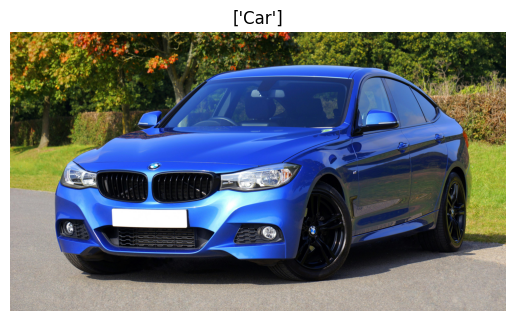

In [16]:
image_path = "testcar.jpg"
predicted_labels = test_image(image_path,loaded_model)

In [17]:
image_path = "busimage.png"
predicted_labels = test_image(image_path,loaded_model)

1/1 [==============================] - 0s 32ms/step


In [19]:
image_path = "E:/PKLot/vehicle/test/testset/000400.jpg"
predicted_labels = test_image(image_path,loaded_model)

1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 45ms/step


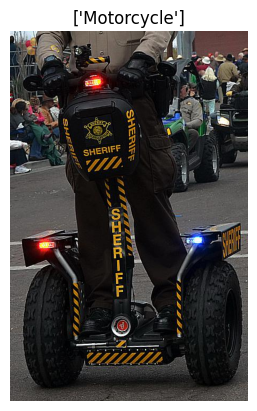

In [24]:
image_path = "E:/PKLot/vehicle/test/testset/000627.jpg"
predicted_labels = test_image(image_path,loaded_model)

In [25]:
image_path = "E:/PKLot/vehicle/test/testset/000640.jpg"
predicted_labels = test_image(image_path,loaded_model)

1/1 [==============================] - 0s 43ms/step


In [26]:
image_path = "E:/PKLot/vehicle/test/testset/000658.jpg"
predicted_labels = test_image(image_path,loaded_model)

1/1 [==============================] - 0s 42ms/step


In [34]:
image_path = "E:/PKLot/vehicle/test/testset/000835.jpg"
predicted_labels = test_image(image_path,loaded_model)

1/1 [==============================] - 0s 43ms/step


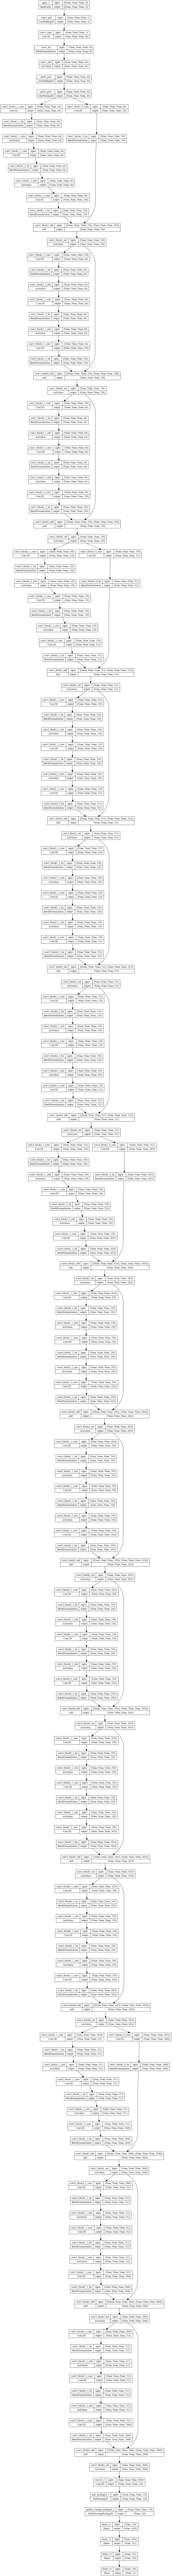

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import pydot

model = Sequential([
    Dense(10, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax')
])

keras.utils.plot_model(loaded_model, show_shapes=True)
